In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

data =pd.read_csv("../sensor_data/sensor_data_200.txt",delimiter=" ",header=None,names=("dates","times","ir","lidar"))
data

,dates,times,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [85]:
data["lidar"][0:5]

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64

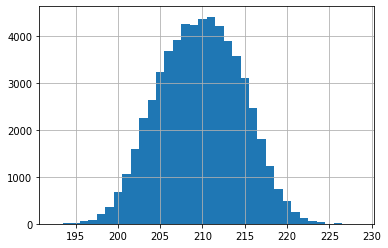

In [86]:
#画直方图
lidar = data["lidar"]
lidar.hist(bins=(max(lidar)-min(lidar)),align="left")
plt.show()

In [87]:
lidar[0:11]

0     214
1     211
2     199
3     208
4     212
5     212
6     215
7     218
8     208
9     217
10    215
Name: lidar, dtype: int64

In [88]:
#算均值
mean1=sum(lidar)/len(lidar)
mean2=lidar.mean()
mean1,mean2

(209.73713297619855, 209.73713297619855)

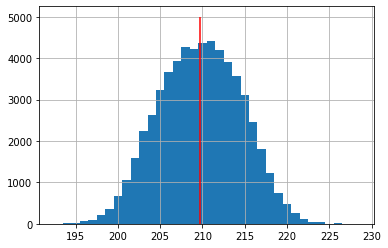

In [89]:
#画出均值
lidar.hist(bins=(max(lidar)-min(lidar)),align="left")
plt.vlines(mean2,ymin=0,ymax=5000,colors="r")
plt.show()

In [90]:
#方差计算
# 定义计算
zs = lidar.values  
mean = sum(zs)/len(zs)
diff_square = [ (z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))     # 样本方差
unbiased_var = sum(diff_square)/(len(zs)-1) # 无偏方差

print(sampling_var)
print(unbiased_var)

# Pandas使用
pandas_sampling_var = lidar.var(ddof=False) # 样本方差
pandas_default_var = lidar.var()        # 无偏方差

print(pandas_sampling_var)
print(pandas_default_var)

# NumPy使用
import numpy as np

numpy_default_var = np.var(lidar)  # 样本方差
numpy_unbiased_var = np.var(lidar, ddof=1)  # 无偏方差

print(numpy_default_var)
print(numpy_unbiased_var)

23.407709770274106
23.40810659855441
23.4077097702742
23.408106598554504
23.4077097702742
23.408106598554504


In [91]:
#计算标准偏差
#定义计算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

#pandas计算
pandas_stddev =lidar.std()

stddev1,stddev1,pandas_stddev

(4.838151482774605, 4.838151482774605, 4.838192492920729)

In [92]:
#列出数据出现次数
freqs =pd.DataFrame(lidar.value_counts())
freqs.transpose()


,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [93]:
#计算各个数值出现概率
freqs["probs"]=freqs["lidar"]/len(lidar)
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [94]:
#确认概率和
sum(freqs["probs"])

1.0

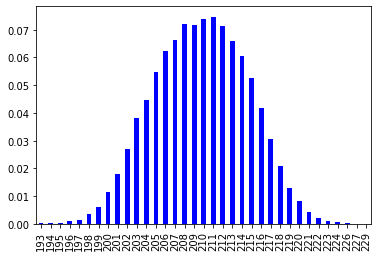

In [95]:
#概率直方图
freqs["probs"].sort_index().plot.bar(color="blue")   ###probdist###
plt.show()

In [96]:
#传感器数值模拟函数
def drawing():
    return freqs.sample(n=1,weights="probs").index[0]
drawing()

206

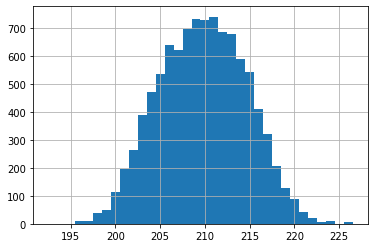

In [97]:
#模拟采样一万次
samples=[drawing() for i in range(10000)]
simulated =pd.DataFrame(samples,columns=["lidar"])
p = simulated["lidar"]
p.hist(bins=max(p)-min(p),align="left")
plt.show()

In [98]:
#根据之前求出得传感器均值以及方差，设计一个正态分布计算 
def p(z, mu=209.7, dev=23.4):   ###pdf_from_def###
    return math.exp(-(z - mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

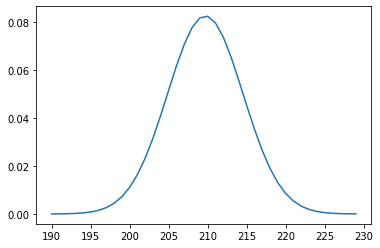

In [99]:
#计算190-230的分布
zs=range(190,230)
ys = [p(z) for z in zs]

plt.plot(zs,ys)
plt.show()

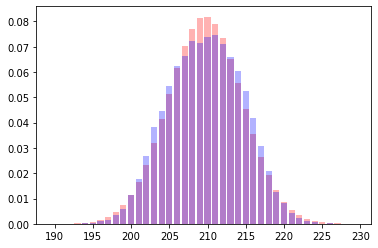

In [100]:
#把上面计算的带小数连续的概率分布，积分成整数分散的分布，也就是在整数x+-0.5以内的概率都积分成x的概率
#因为正态分布函数不好积分，所以直接用梯形公式来近似积分
#将正态分布积分的结果与前面计算的lidar数据的概率分布图做比较 正态分布概率图为红色，真值分布概率图为蓝色
def prob(z,width=0.5):                                     ###prob_plot_from_def###
    return width*( p(z-width) + p(z+width) )

zs = range(190,230)
ys = [prob(z) for z in zs]

plt.bar(zs,ys, color="red", alpha=0.3) #alpha设置图形透明率
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()


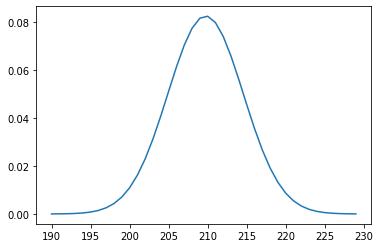

In [101]:
#用scipy来计算概率密度函数
#同样是需要方差以及标准偏差
from scipy.stats import norm

zs=range(190,230)
ys=[norm.pdf(z,mean1,stddev1) for z in zs]

plt.plot(zs,ys)
plt.show()

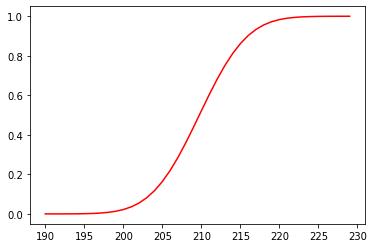

In [102]:
#用scipy来计算累积分布函数

zs = range(190,230)                                ###cdf###
ys = [norm.cdf(z, mean1, stddev1) for z in zs]

plt.plot(zs,ys, color="red") 
plt.show()

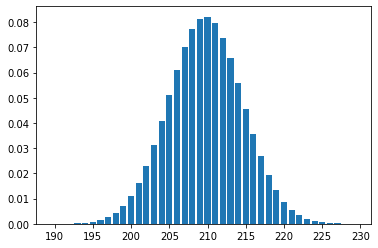

In [103]:
#可以用累积分布函数来完成刚才P函数的积分
zs = range(190,230)              ###prob_cdf###
ys = [norm.cdf(z+0.5, mean1, stddev1) -  norm.cdf(z-0.5, mean1, stddev1) for z in zs]

plt.bar(zs,ys)
plt.show()

2.3.3

In [104]:
#用random来计算丢骰子一万次的平均值
import random
samples = [random.choice([1,2,3,4,5,6]) for i in range(10000)]
sum(samples)/len(samples)

3.4959

2.4 复杂的分布

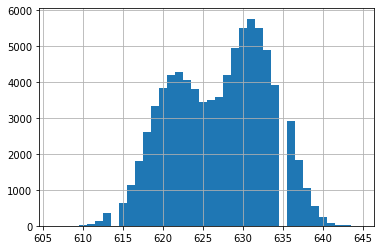

In [105]:
#读取 sensor_data_600 里面的数据并画出来

data_600 = pd.read_csv("../sensor_data/sensor_data_600.txt",delimiter=" ",
                        header=None,names=("data","time","ir","lidar"))

lidar_600=data_600["lidar"]
lidar_600.hist(bins=max(lidar_600)-min(lidar_600),align="left")

plt.show()

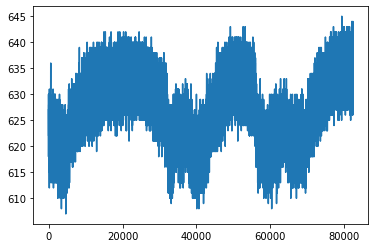

In [106]:
#按照时间顺序画出lidar的数值

lidar_600.plot()
plt.show()

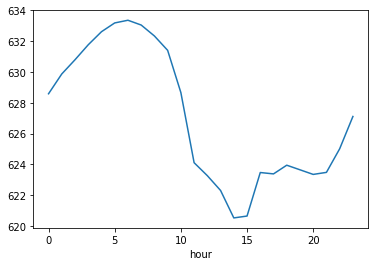

In [107]:
#把数据按照时间段分组 并画出各组平均值
#新增一列数据hour，对应数据时间除以10000并舍去小数点 time是小时，分，秒的6位数数据 所以也就是按小时分组
data_600["hour"]=[e//10000 for e in data_600.time] 
#pandas函数 按照一类数据来对整体进行数据分组
d =data_600.groupby("hour") 
#mean返回平均值 plot画出
d.lidar.mean().plot()
plt.show()

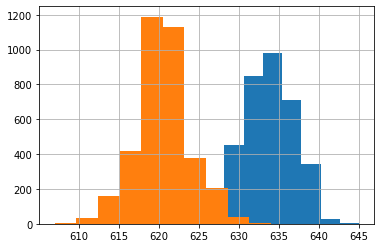

In [108]:
#取出6点以及14点两个最值的数据画出来比较
d.lidar.get_group(6).hist()     ###two_mode_hist###
d.lidar.get_group(14).hist()
plt.show()

2.4.2 联合概率和加法定理 乘法定理

In [109]:
#分别统计每个时间组里面数据出现的次数 然后除以全体数据的个数就可以得到概率
#统计每一个小时内数据出现的次数
each_hour = { i : d.lidar.get_group(i).value_counts().sort_index()  for i in range(24)}   ###calc_joint_probs
freqs = pd.concat(each_hour, axis=1) #concat把刚才分开的数据再接上 横轴拼接
freqs = freqs.fillna(0)     #把没有数据的地方(NaN)，用0来替换
probs = freqs/len(data_600) #次数除以数据数量得倒概率

probs #表示

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000036,0.000049,0.000000,0.000000,0.000012,0.000012,0.000134,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000146,0.000122,0.000000,0.000000,0.000000,0.000024,0.000073,0.000146,0.000049,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000219,0.000316,0.000000,0.000036,0.000036,0.000061,0.000255,0.000194,0.000024,0.000012
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000620,0.000644,0.000024,0.000182,0.000061,0.000219,0.000680,0.000437,0.000109,0.000024
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001300,0.001045,0.000024,0.000207,0.000267,0.000377,0.000984,0.001021,0.000474,0.000049
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001956,0.001810,0.000219,0.000595,0.000595,0.001021,0.001725,0.001397,0.000595,0.000085
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003111,0.002928,0.000510,0.001264,0.000923,0.001640,0.002211,0.002296,0.001021,0.000146


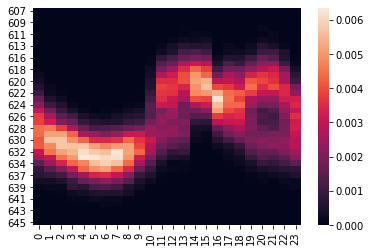

In [110]:
#用seaborn来画图表现上面那组数据
import seaborn as sns

sns.heatmap(probs)
plt.show()

c:\Users\KERO\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


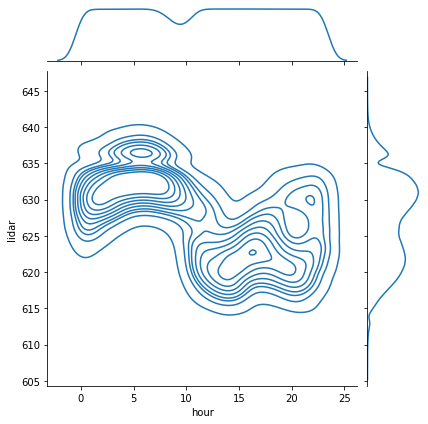

In [111]:
#jointplot函数，综合可视化两组数据分布 分别绘制他们的散点图和直方图
sns.jointplot(data_600["hour"], data_600["lidar"], data_600, kind="kde")
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.043013,0.042916,0.042879,0.042916,0.042964,0.043037,0.043061,0.043001,0.038712,0.028651,...,0.043183,0.043122,0.043061,0.043122,0.043049,0.043086,0.043159,0.042976,0.043049,0.043037


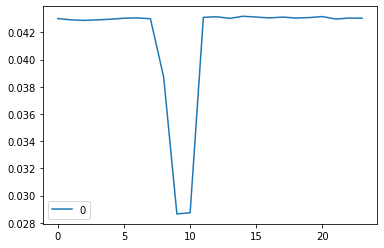

In [112]:
p_t = pd.DataFrame(probs.sum())   #按照列来把数据累加 也就是把时间带内所有数据出现的概率累加 P(t)  
p_t.plot()
p_t.transpose() #数据转向，横着看方便

In [113]:
p_t.sum()    # 验证概率累加为1

0    1.0
dtype: float64

,607,608,609,610,611,612,613,615,616,617,...,636,637,638,639,640,641,642,643,644,645
0,0.000012,0.000049,0.000061,0.000328,0.00068,0.00158,0.004241,0.007752,0.013852,0.022053,...,0.03537,0.02226,0.012819,0.006671,0.002989,0.000996,0.000401,0.000109,0.000024,0.000012


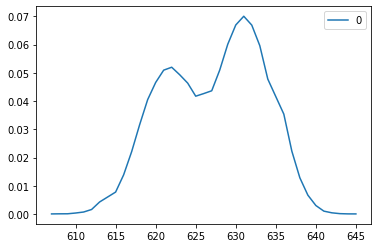

In [114]:
#旋转，让行变成传感器数据Z，然后逐列累加 也就是统计这个数值在所有时间带内出现的概率 P(z)
p_z = pd.DataFrame(probs.transpose().sum())  
p_z.plot()
p_z.transpose()

In [115]:
p_z.sum()    # 验证概率累加为1

0    1.0
dtype: float64

In [ ]:
cond_z_t = probs/p_t[0]  #列（時間）ごとにP(t)で割るとP(x|t)となる   ###lidar600cond
cond_z_t